In [105]:
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt
import pandas_datareader as pdr

In [106]:
start = datetime(2016,1,1)
stop = datetime.today()

In [131]:
portfolio = ['GOOG', 'AMZN', 'META', 'AAPL', 'TSLA']
#portfolio = ['NFLX', 'AMZN', 'DIS', 'V', 'GOOGL']

In [132]:
df = pd.DataFrame()

for i in portfolio:
    df[i] = pdr.DataReader(i, 'yahoo', start, stop)['Close']

In [133]:
#((df/df.iloc[0])*100).plot(figsize=(16,10));

In [134]:
returns = np.log(df/df.shift(1))
returns.head()

,GOOG,AMZN,META,AAPL,TSLA
Date,,,,,
2016-01-04,NaN,NaN,NaN,NaN,NaN
2016-01-05,0.000997,-0.005036,0.004977,-0.025379,0.000090
2016-01-06,0.001399,-0.001800,0.002333,-0.019764,-0.019844
2016-01-07,-0.023443,-0.039841,-0.050287,-0.043121,-0.015598
2016-01-08,-0.016546,-0.001465,-0.006044,0.005274,-0.021799


In [135]:
returns.cov() * 252

,GOOG,AMZN,META,AAPL,TSLA
GOOG,0.074919,0.058716,0.068436,0.054294,0.064320
AMZN,0.058716,0.103914,0.073262,0.058851,0.076633
META,0.068436,0.073262,0.138320,0.062417,0.075241
AAPL,0.054294,0.058851,0.062417,0.089579,0.077476
TSLA,0.064320,0.076633,0.075241,0.077476,0.341806


In [136]:
noa = len(portfolio)

In [137]:
weights = np.random.random(noa)

weights /= np.sum(weights)

In [138]:
weights

array([0.17398152, 0.15049979, 0.1840229 , 0.05331337, 0.43818242])

In [139]:
expected_return = np.sum(returns.mean()*weights)*252
expected_return

0.2885086969743717

In [140]:
expected_variance = np.dot(weights.T , np.dot(returns.cov()*252,weights))

In [141]:
np.sqrt(expected_variance)

0.3543276032656938

In [142]:
mc_returns = []
mc_volatility = []

for i in range(2500):
    weights = np.random.random(noa)
    weights /= np.sum(weights)
    mc_returns.append(np.sum(returns.mean() * weights) * 252)
    mc_volatility.append(np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights ))))
    
mreturns = np.array(mc_returns)
mvolatility = np.array(mc_volatility)

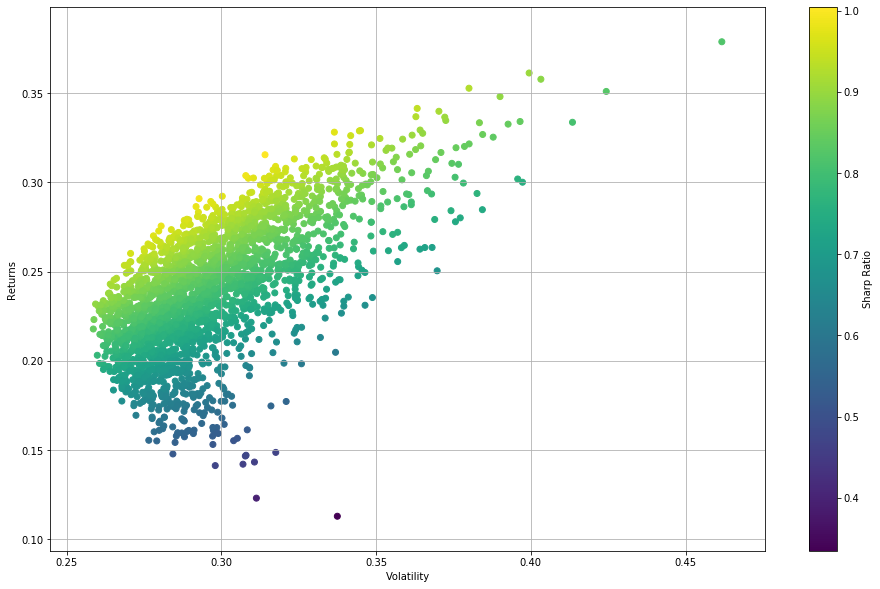

In [143]:
plt.figure(figsize=(16,10))
c = mreturns/mvolatility
plt.scatter(mvolatility, mreturns, c=c, marker='o')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.grid(True)
plt.colorbar(label="Sharp Ratio")

In [144]:
m = mreturns/mvolatility
m.max()

1.004379871769224